In [50]:
# Prediction of Apple stock with help of data over the last 60 days

In [156]:
#importing libraries
import math
import pandas
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [157]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01', end='2020-12-31' )

In [158]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591936
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659611
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800155
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933966
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913451
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.161407
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.852493
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.043655


In [159]:
#Get the no. of rows and col in the data set
df.shape

(2265, 6)

Text(0, 0.5, 'Close Price USD ($)')

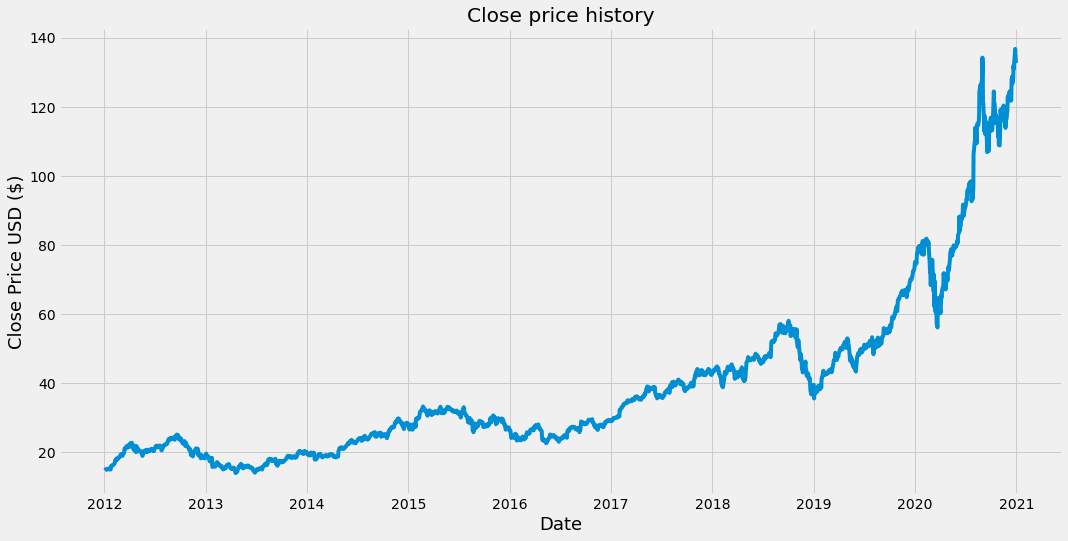

In [161]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)

In [162]:
#Create new dataframe with only the "close" column
data= df.filter(['Close'])
#Convert the dataframe to numy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len= math.ceil( len(dataset)* .8)

In [163]:
training_data_len

1812

In [164]:
#Scaling the data for preproccesing 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [165]:
#Create the training data
#Create the scaled training data set
train_data= scaled_data[0:training_data_len, :]
#Spit the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]



In [166]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [167]:
#Reshape the data
#LSTM data need to be 3D
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1752, 60, 1)

In [168]:
#Build LSTM model
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [169]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [170]:
#Train the model
model.fit(x_train, y_train , batch_size=1, epochs=1)

1752/1752 [==============================] - 26s 14ms/step - loss: 2.5960e-04


In [171]:
#Create the testing dataset
#Create a new array containing scaled values from index 1712 
test_data= scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test= []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [172]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [173]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [174]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [175]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test )**2 )
rmse

4.467038539861211

<ipython-input-176-8c4dddbd1619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


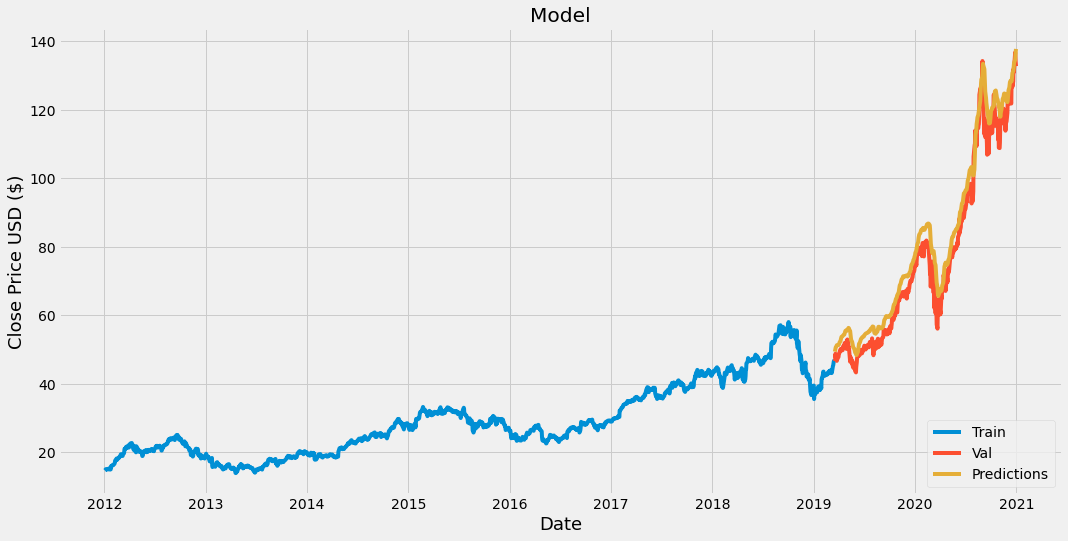

In [176]:
#PLot the data
train= data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [177]:
#Show the valid(actual) and predicted prices
valid


,Close,Predictions
Date,,
2019-03-19,46.632500,49.378876
2019-03-20,47.040001,49.774734
2019-03-21,48.772499,50.128647
2019-03-22,47.762501,50.639523
2019-03-25,47.185001,51.037823
...,...,...
2020-12-24,131.970001,133.708328
2020-12-28,136.690002,134.549347
2020-12-29,134.869995,135.896835


In [178]:
#Get the quote
apple_quote= web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-12-31')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days= new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled= scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[137.97269]]


In [179]:
#Get the quote
apple_quote2= web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2021-01-04')
print(apple_quote2['Close'])

Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2020-12-28    136.690002
2020-12-29    134.869995
2020-12-30    133.720001
2020-12-31    132.690002
2021-01-04    129.410004
Name: Close, Length: 2266, dtype: float64
